## JPMQR MINI PROJECT 2
### LINEAR ALGEBRA ASSIGNMENT

In [34]:
import warnings 
warnings.filterwarnings('ignore')

## Import statements

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 

Data of NIFTY.csv is loaded into a pandas dataframe and certain variables are defined as global.

In [36]:
df = pd.read_csv('NIFTY.csv')                            # Loading the Data

global df_train                                          # defining global variable df_train
global df_test                                           # defining global variable df_test
global train_y                                           # defining global variable train_y
global test_y                                            # defining global variable y_test
global X_train_scaled
global X_test_scaled
global X_train_scaled_df
global X_test_scaled_df
global X_tr_pca_var_99
global X_tr_pca_var_95
global X_tr_pca_var_95_df

## DATA PREPROCESSING
We define a function preprocess() to do some preprocessing before we train our model. It looks for null and duplicate values in our dataset and removes them before training our model for multivariate linear regression.

In [37]:
def preprocess():
    df.info()                                                # Basic information about the data frame
    df.describe()                                            # Statistical Information about the dataframe
    df.isnull().sum()                                        # NULL values in each series of our dataframe
    df.dropna(inplace=True)                                  # drop the NA values
    df.reset_index(drop=True,inplace=True)                   # reset the index after dropping the values
    print("shape of dataframe is : ",df.shape)               # print the shape of the dataframe

## TASK 1
We define a function task_one() that performs the first task given in the assignment. We compued the technical indicators SMA, EMA, MACD, Range, stochastic oscillators and MFI. 

We plotted each of these technical indicators using pyplot from matplotlib.

Lastly, we split the data into training and testing dataset. We also split training and testing data into independent and dependent variables

In [38]:
def task_one():
    global df_train                                          # defining global variable df_train
    global df_test                                           # defining global variable df_test
    global train_y                                           # defining global variable train_y
    global test_y                                            # defining global variable y_test
    global X_train_scaled
    global X_test_scaled
    global X_train_scaled_df
    global X_test_scaled_df
    global X_tr_pca_var_99
    global X_tr_pca_var_95
    global X_tr_pca_var_95_df
    
    # Calculating the short-window simple moving average
    df['SMA'] = df['Close'].rolling(window=10).mean()
    
    # Plotting the SMA
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["SMA"], color="blue", label="SMA")
    plt.plot(df.Close, color="red", label="Close prices")
    plt.title("SIMPLE MOVING AVERAGE")
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculating the exponential moving average
    df['EMA'] = df['Close'].ewm(span=10).mean()
    
    # Plotting the EMA
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["SMA"], color="blue", label="SMA")                       # plotting SMA
    plt.plot(df["EMA"], color="green", label="EMA")                      # plotting EMA
    plt.plot(df.Close, color="red", label="Close prices")                # plotting close prices
    plt.title("EXPONENTIAL MOVING AVERAGE")
    plt.legend(loc="lower right")
    plt.show()
    
    # Plotting the zoomed plot of the above plot.
    #In the zoom figure, we can clearly observe that indeed EMA responds faster to the change of trends and gets closer to them.
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.axis([1000, 1200, 14000, 16000])
    plt.title('ZOOMED PLOT COMPARISON OF SMA, EMA AND CLOSING PRICES')
    plt.plot(df["SMA"], color="blue", label="SMA")                       # plotting SMA
    plt.plot(df["EMA"], color="green", label="EMA")
    plt.plot(df.Close, color="red", label="Close prices")                # plotting close prices
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculating MACD
    exp1 = df['Close'].ewm(span=12,adjust=False).mean()
    exp2 = df['Close'].ewm(span=26,adjust=False).mean()
    df['MACD'] = exp1 - exp2
    
    # A nine-day EMA of the MACD called the “signal line,” is then plotted on top of the MACD line, 
    # which can function as a trigger for buy and sell signals.
    df['MACDS'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # Plotting MACD
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["MACD"], color="b", label="MACD")
    plt.plot(df["MACDS"], color="red", label="Signal Line")
    plt.title("MOVING AVERAGE CONVERGENCE DIVERGENCE")
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculating the range
    df['10-high'] = df['High'].rolling(10).max()
    df['10-low'] = df['Low'].rolling(10).min()
    df['Range'] = df['10-high'] - df['10-low'] 
    
    # Plotting the range
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.subplot(2, 1, 1)
    plt.title("RANGE")
    plt.plot(df["Range"], color="green", label="Range")

    plt.subplot(2, 1, 2)
    plt.title("CLOSING PRICES")
    plt.plot(df["Close"], color="red", label="Closing Prices")

    plt.show()
    
    # Calculating %K and %D
    df['14-high'] = df['High'].rolling(14).max()
    df['14-low'] = df['Low'].rolling(14).min()
    df['%K'] = (df['Close'] - df['14-low'])*100/(df['14-high'] - df['14-low'])
    df['%D'] = df['%K'].rolling(3).mean()
    
    # Plotting the calculated stochastic oscillators
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(20,10))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["%K"], color="b", label="%K")
    plt.plot(df["%D"], color="red", label="%D")
    plt.axhline(20, linestyle='--', color="green")
    plt.axhline(80, linestyle="--", color="green")
    plt.title("FAST AND SLOW STOCHASTIC OSCILLATORS")
    plt.legend(loc="lower right")
    plt.show()
    
    
    
    # Calculate the typical price
    typical_price = (df['Close'] + df['High'] + df['Low'])/3

    # Get the period
    period = 14

    # Calculate the money flow
    money_flow = typical_price * df['Volume']

    # Get all of the positive and negative money flows
    positive_flow = []
    negative_flow = []

    print(len(typical_price))
    
    # Loop through the typical price
    for i in range(1, len(typical_price)):
        if (typical_price[i] > typical_price[i-1]):
            positive_flow.append(money_flow[i-1])
            negative_flow.append(0)

        elif typical_price[i] < typical_price[i-1]:
            negative_flow.append(money_flow[i-1])
            positive_flow.append(0)

        else:
            negative_flow.append(0)
            positive_flow.append(0)
            
    # all the positive and negative money flows 
    positive_mf = []
    negative_mf = []

    for i in range(period-1, len(positive_flow)+period):
        positive_mf.append( np.sum(positive_flow[ i+1-period : i+1 ]) )

    for i in range(period-1, len(negative_flow)+period):
        negative_mf.append( np.sum(negative_flow[ i+1-period : i+1 ]) )
    
    # Calculate the money flow index
    MFI = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))
    df['MFI'] = MFI
    
    # Plot the money flow index
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["MFI"], color="darkblue", label="MFI")
    plt.axhline(10, linestyle='--', color="red")
    plt.axhline(20, linestyle='--', color="green")
    plt.axhline(80, linestyle="--", color="green")
    plt.axhline(90, linestyle='--', color="red")
    plt.title("MONEY FLOW INDEX (MFI)")
    plt.ylabel("MFI values")
    plt.legend(loc="lower right")
    plt.show()
    
    # Split the data into training and testing dataframes
    start_date = "2016-10-01"
    end_date = "2020-09-30"
    after_start_date = df["Date"] >= start_date
    before_end_date = df["Date"] <= end_date
    between_two_dates = after_start_date & before_end_date
    global df_train
    global df_test
    df_train = df.loc[between_two_dates]
    df_train.tail()
    
    df_test = df.iloc[983:]
    
    # Only include technical indicators, closing price, high price and low price as features, remove the rest.
    df_train.drop(['Date','Open','Adj Close','MACDS','14-high','14-low','10-high','10-low'],axis=1,inplace=True)
    df_test.drop(['Date','Open','Adj Close','MACDS','14-high','14-low','10-high','10-low'],axis=1, inplace=True)
    
    df_train.isnull().sum()                                       # NULL values in each series of our dataframe
    
    # Check for null values in training and testing dataframe and remove the null values
    df_train = df_train.iloc[15:]
    df_train.isnull().sum()
    
    # Reset the index
    df_train.reset_index(drop=True,inplace=True)
    print("\n\nshape of training data is : ",df_train.shape)
    
    # Split the data into independent and dependent variable for both training and testing
    train_y = df_train['Close']
    df_train = df_train.drop('Close',axis=1)
    
    df_test.dropna(inplace = True)
    df_test.reset_index(drop=True,inplace=True)
    print("\n\nshape of testing data is : ",df_test.shape)
    
    test_y = df_test['Close']
    df_test = df_test.drop('Close',axis=1)
    
    # normalise training y and testing y
    norm1= np.linalg.norm(train_y)
    train_y = train_y/norm1

    norm2 = np.linalg.norm(test_y)
    test_y = test_y/norm1

## TASK 2
In this task, we perform the Principal Component Analysis (PCA).

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

<b>Step 1</b>: I performed Standardization to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.

$z = \frac{value - mean}{standard deviation} $

Once the standardization is done, all the variables will be transformed to the same scale.

<b>Step 2</b>: Next, i computed the covariance matrix to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

It’s actually the sign of the covariance that matters :

->if positive then : the two variables increase or decrease together (correlated)

->if negative then : One increases when the other decreases (Inversely correlated)

The covariance matrix is not more than a table that summaries the correlations between all the possible pairs of variables

<b>Step 3</b>: Next, I computed the eigenvalues and eigenvectors from the covariance matrix to identify the principal components.

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on.

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. 

Principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. This continues until a total of p principal components have been calculated, equal to the original number of variables.

<b>Step 4</b>: Computing the eigenvectors and ordering them by their eigenvalues in descending order, allow us to find the principal components in order of significance. In this step, I chose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call Feature vector.

<b>Step 5</b>: I used the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components. This can be done by multiplying the transpose of the original data set by the transpose of the feature vector.

Lastly, I also computed PCA using sklearn's inbuilt library and proved that it outputs the same result. Hence our principal component analysis is correct.


In [39]:
def task_two():
    global train_y                                           # defining global variable train_y
    global test_y                                            # defining global variable y_test
    global X_train_scaled
    global X_test_scaled
    global X_train_scaled_df
    global X_test_scaled_df
    global X_tr_pca_var_99
    global X_tr_pca_var_95
    global X_tr_pca_var_95_df
    
    # STANDARDIZATION
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(df_train)
    X_test_scaled = scaler.transform(df_test)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = ['High','Low','Volume','SMA','EMA','MACD','%K','%D','Range','MFI'])
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = ['High','Low','Volume','SMA','EMA','MACD','%K','%D','Range','MFI'])
    
    # COMPUTING COVARIANCE MATRIX
    cov_mat = np.cov(X_train_scaled_df.T)
    
    # COMPUTING EIGENVALUES
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    print("\n\nnumber of eigenvalues : ",len(eigen_vals))
    print("\n\neigenvalues : ",eigen_vals)
    f, ax = plt.subplots(figsize=(10,12))                # Figure size

    cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Color map

    _ = sns.heatmap(cov_mat, cmap="Blues", square=True, ax=ax, annot=True, linewidth=0.1)     # plot a heat map

    plt.title("Covariance Matrix", y=1.05, size=15)
    plt.show()
    
    

    # calculate cumulative sum of explained variances
    total = np.sum(eigen_vals)
    var_explained = [(i / total) for i in sorted(eigen_vals, reverse=True)]
    cum_var_explained = np.cumsum(var_explained)

    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12)) 
    # plot explained variances
    plt.bar(range(1,11), var_explained, alpha=0.5,
            align='center', label='individual explained variance',color='blue')
    plt.step(range(1,11), cum_var_explained,'red', where='mid',
             label='cumulative explained variance')
    for i in range(1,len(cum_var_explained)):
        plt.text(i, cum_var_explained[i-1]+0.02 , '{:.3f}%'.format(cum_var_explained[i-1]))

    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.title("Cumulative and explained variances of individual principle components calculated using eigenvalues")
    plt.legend(loc='best')
    plt.show()
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
    
    # ORDERING EIGENVECTORS
    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    
    # FEATURE VECTOR
    F99 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis], eigen_pairs[3][1][:, np.newaxis], eigen_pairs[4][1][:, np.newaxis], eigen_pairs[5][1][:, np.newaxis]))
    print('\n\nMatrix W with 99% variance:\n', F99)
    F95 =  np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis], eigen_pairs[3][1][:, np.newaxis], eigen_pairs[4][1][:, np.newaxis]))
    print('\n\nMatrix W with 95% variance:\n', F95)
    
    # REORIENT DATA FROM ORIGINAL AXIS TO PRINCIPAL COMPONENT AXIS
    X_tr_pca_var_99 = X_train_scaled.dot(F99)
    X_tr_pca_var_95 = X_train_scaled.dot(F95)
    
    print("\n\noriginal shape:   ", df_train.shape)
    print("\n\nshape with 99% variance:", X_tr_pca_var_99.shape)
    print("\n\nshape with 95% variance:", X_tr_pca_var_95.shape)
    
    X_tr_pca_var_95_df = pd.DataFrame(X_tr_pca_var_95, columns = ['X1','X2','X3','X4','X5'])
    
    pca = PCA()

    # fit_transform() is used to calculate the PCAs from training data
    X_train_pca = pca.fit_transform(X_train_scaled)

    # to get the fit statistics (variance explained per component)
    print("\n\nsklearn var:\n", pca.explained_variance_ratio_)
    print("\n\nnumpy var: \n", eigen_vals/np.sum(eigen_vals))
    
    
    # like we did above visualize the PCs 
    # and the cumulative variance explained by each PC
    plt.figure(figsize=(16,12)) 
    plt.bar(range(1,11), pca.explained_variance_ratio_,
            alpha=0.5,
            align='center',
           color = 'blue')
    plt.step(range(1,11), np.cumsum(pca.explained_variance_ratio_),
             where='mid',
             color='red')
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    for i in range(1,len(cum_var)):

        plt.text(i, cum_var[i-1]+0.02 , '{:.3f}%'.format(cum_var[i-1]))
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.title("Cumulative and explained variances of individual principle components calculated using sklearn")
    plt.show()

## TASK 3
In this task we use sklearn's LinearRegression model to perform Multivariate linear regression on the Feature Vector we extracted using PCA in the previous step.

We output the root mean squared error of the predicted differences in closing prices compared with actual differences in closing prices.

In [40]:
def pca_var(var):
    global df_train                                          # defining global variable df_train
    global df_test                                           # defining global variable df_test
    global train_y                                           # defining global variable train_y
    global test_y                                            # defining global variable y_test
    global X_train_scaled
    global X_test_scaled
    global X_train_scaled_df
    global X_test_scaled_df
    global X_tr_pca_var_99
    global X_tr_pca_var_95
    global X_tr_pca_var_95_df
    # we can either use number of componets
    # or cumulative explained variance ratio
    # like PCA(0.95)
    pca = PCA(var)

    # fit_transform() to calculate the coordinate system
    X_train_pca = pca.fit_transform(X_train_scaled)
    # transform() to apply that coordinate system
    X_test_pca = pca.transform(X_test_scaled)
    pca.explained_variance_ratio_
    np.cumsum(pca.explained_variance_ratio_)
    model = LinearRegression()
    model.fit(X_train_pca, train_y)
    y_pred = model.predict(X_test_pca)
    y_pred = pd.Series(y_pred)
    
    # output the model coefficients
    print(f"\n\nmodel coefficients with {var}  variance are ",model.coef_)
    
    # calculate successive differnces in predicted closing prices
    pred_closing_price_diff = []
    for i in range(1,len(y_pred)) :
        pred_closing_price_diff.append(y_pred[i]-y_pred[i-1])
        
    # calculate successive differnces in actual closing prices   
    actual_closing_price_diff = []
    for i in range(1,len(test_y)) :
        actual_closing_price_diff.append(test_y[i]-test_y[i-1])
    x = np.arange(1,244,1)
    
    # Plot the Comparison of predicted and actual differences in closing prices
    plt.figure(figsize=(16,12)) 
    plt.plot(x,actual_closing_price_diff,'blue', label = 'Actual closing price difference')
    plt.plot(x,pred_closing_price_diff,'red', label = 'Predicted closing price difference')
    plt.legend(loc = "best")
    plt.title("Comparison of predicted and actual differences in closing prices")
    plt.show()
    
    # Print the root mean squared error.
    print(f"\n\n\n\nroot mean square error with {var}  variance is ",np.sqrt(mean_squared_error(actual_closing_price_diff, pred_closing_price_diff))*100)

def task_three():
    pca_var(0.95) # For 95% variance, 5 principal components
    pca_var(0.99) # For 99% variance, 6 principal components

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1228 non-null   float64
 2   High       1228 non-null   float64
 3   Low        1228 non-null   float64
 4   Close      1228 non-null   float64
 5   Adj Close  1228 non-null   float64
 6   Volume     1228 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB
shape of dataframe is :  (1228, 7)


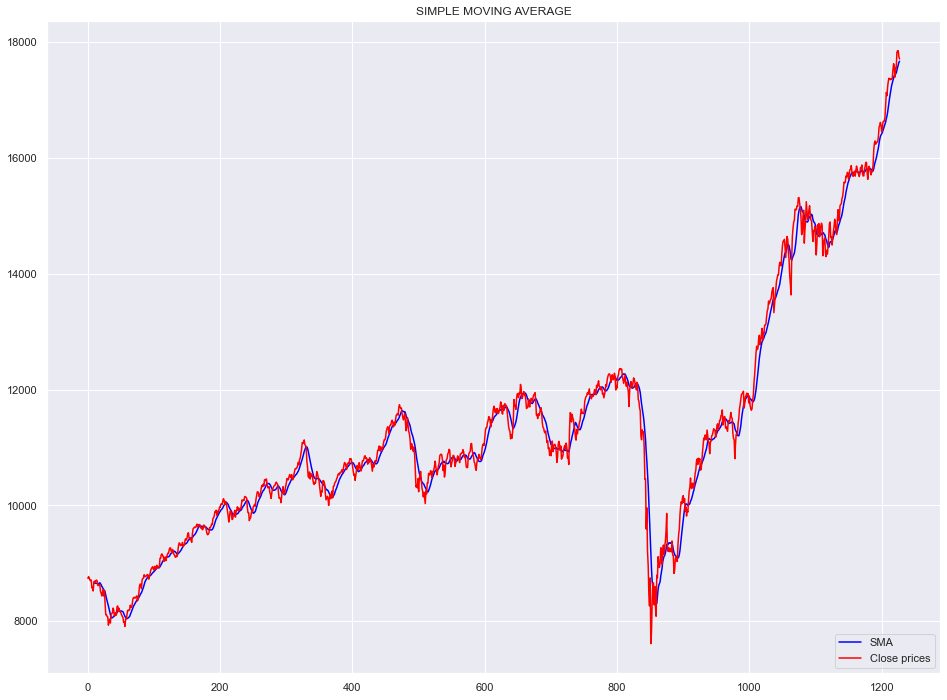

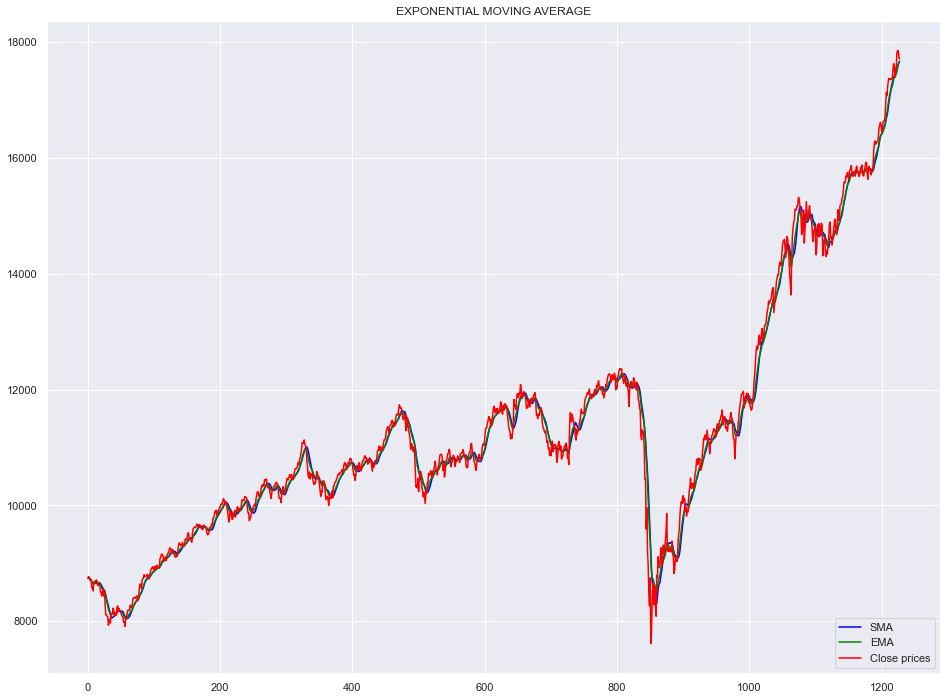

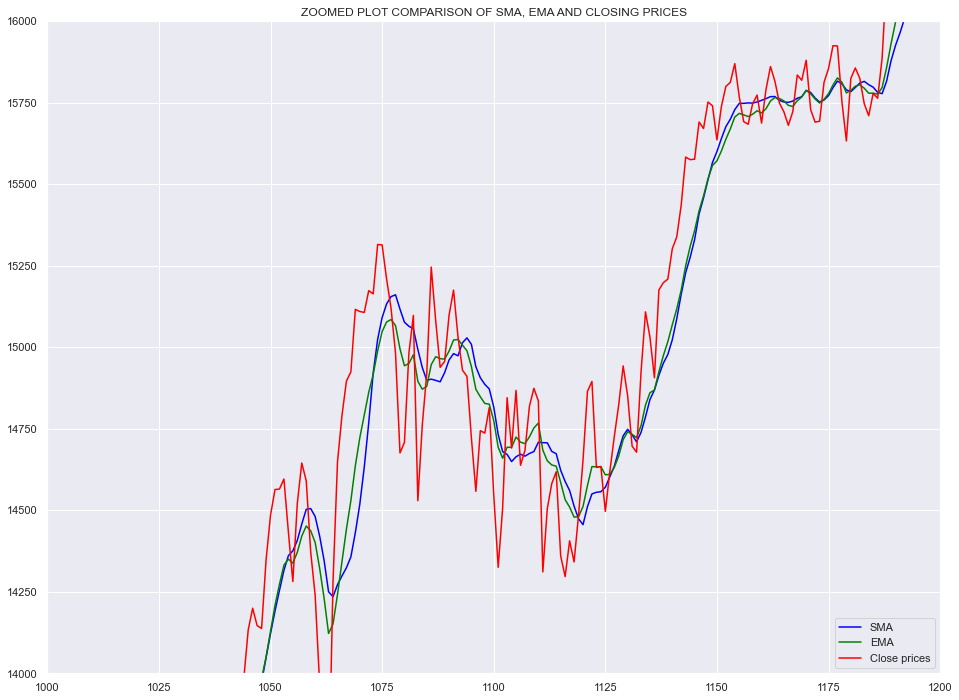

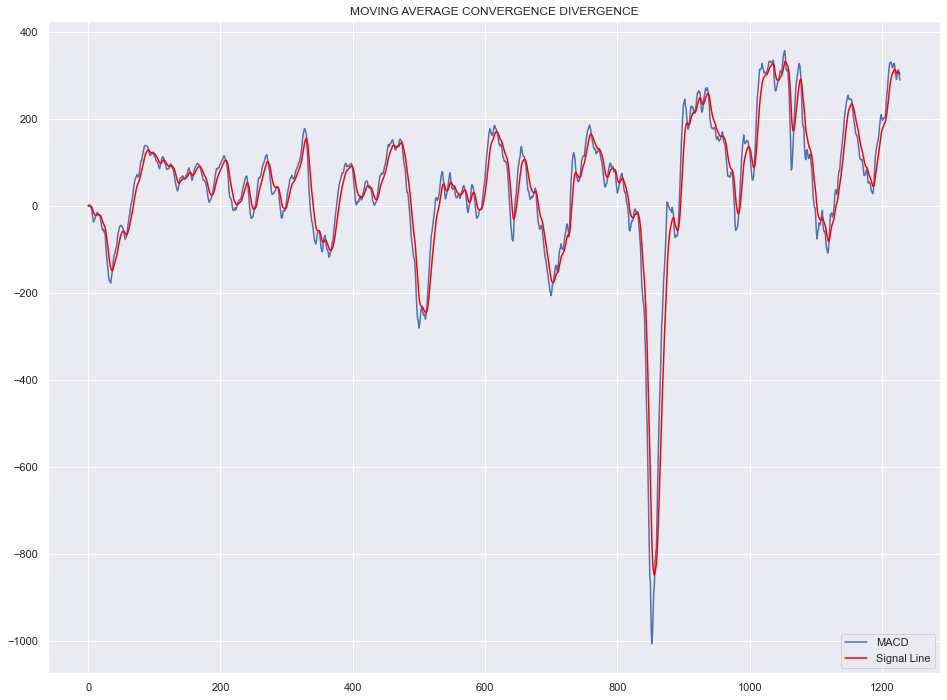

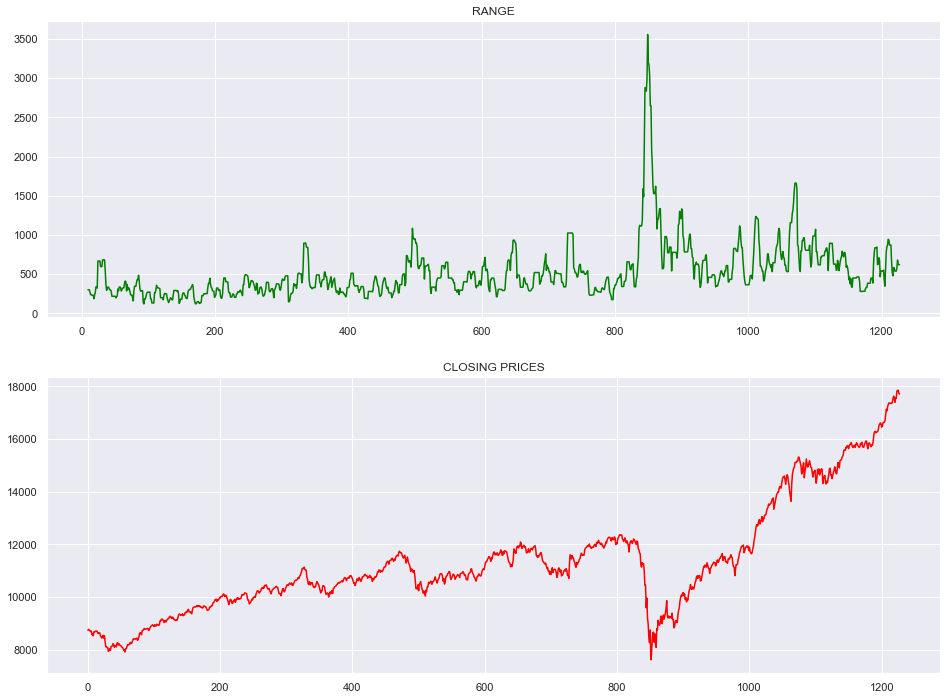

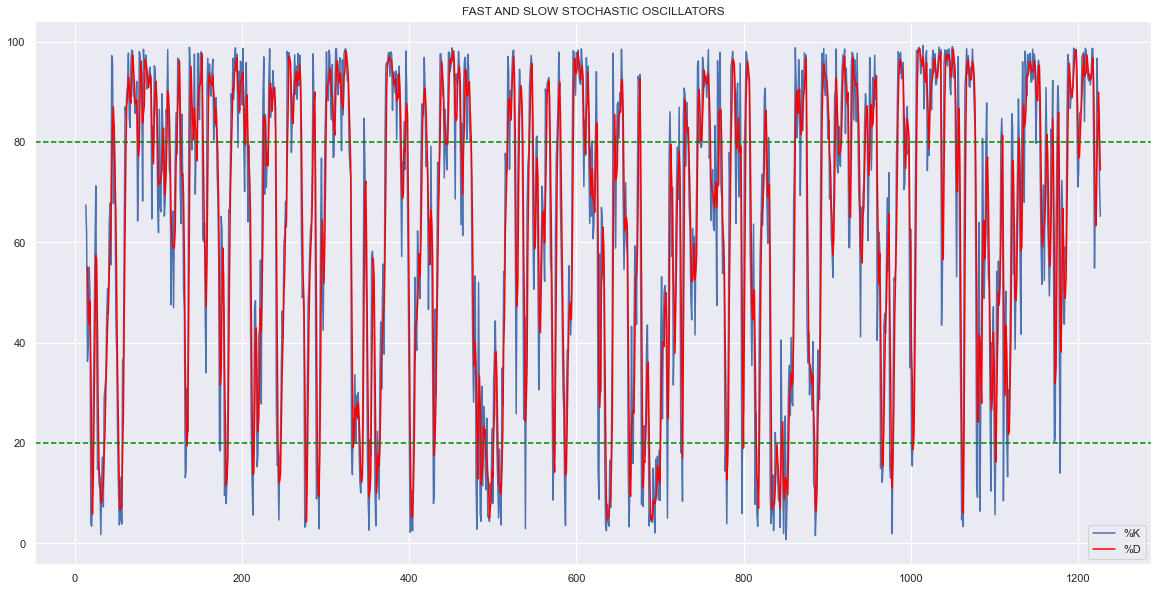

1228


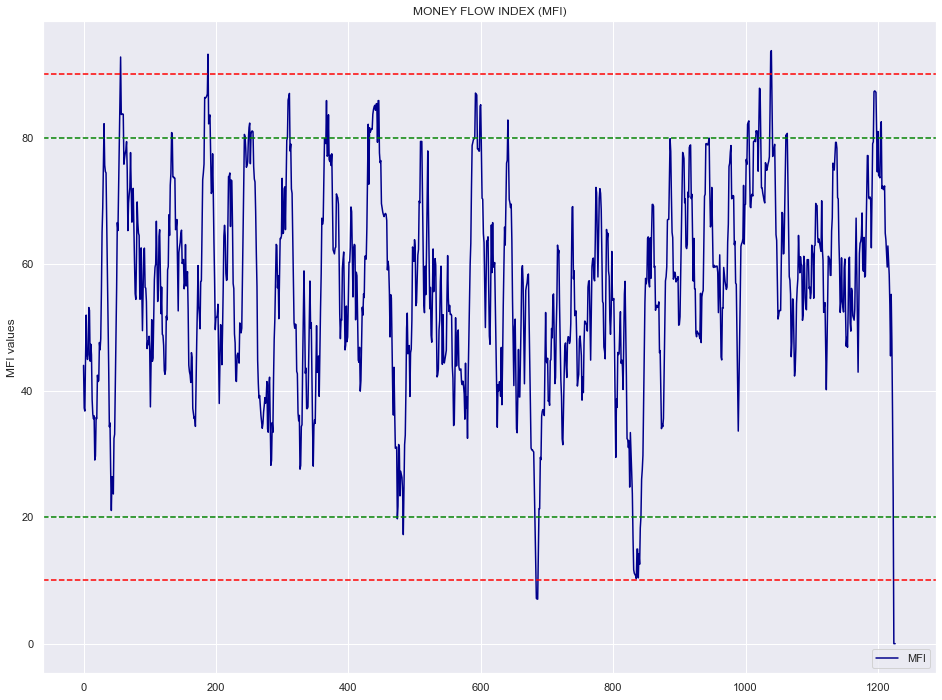



shape of training data is :  (968, 11)


shape of testing data is :  (244, 11)


number of eigenvalues :  10


eigenvalues :  [4.27107265e+00 2.65863824e+00 1.38834150e+00 9.08076159e-01
 5.08050169e-01 1.85698080e-01 7.69974988e-02 1.17745599e-02
 1.44864315e-03 2.43762252e-04]


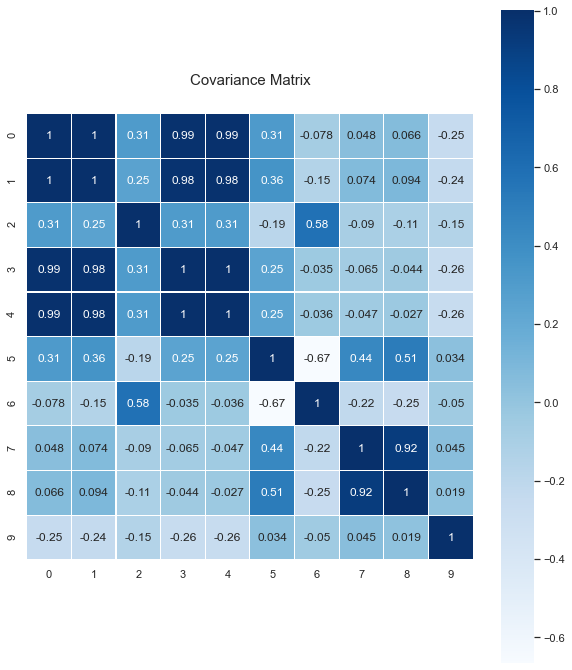

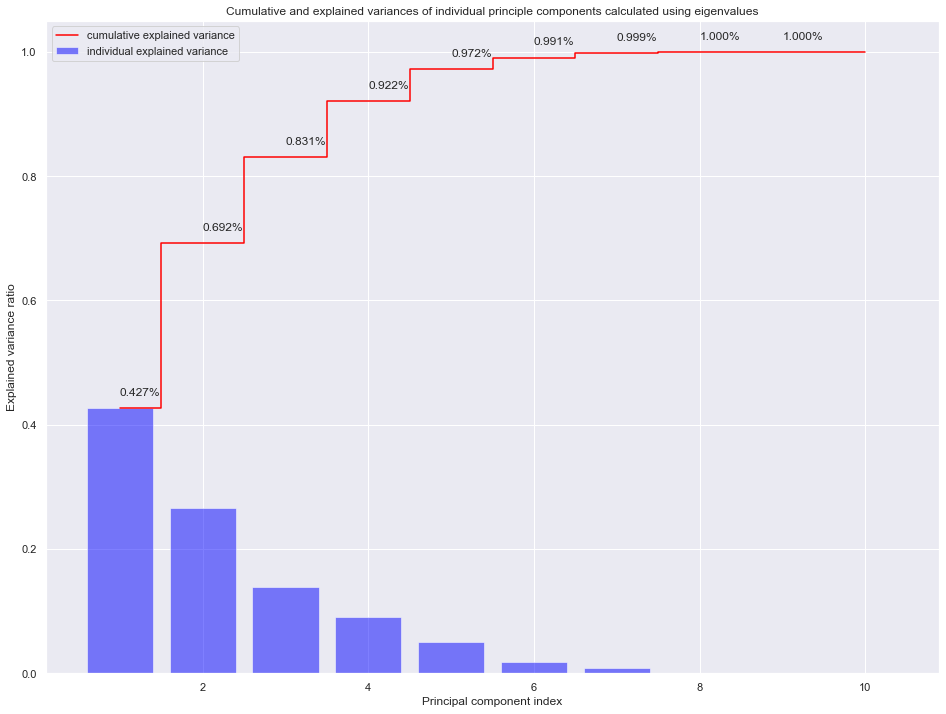



Matrix W with 99% variance:
 [[ 0.48022599  0.02838255 -0.01250474  0.07154492 -0.10949365 -0.02331594]
 [ 0.47985933 -0.00777674 -0.04455163  0.0627462  -0.11096247 -0.04828396]
 [ 0.15590885  0.3075768   0.52215827  0.13613707  0.66176582 -0.38609387]
 [ 0.47397731  0.08908652 -0.06147713  0.06331031 -0.11523374  0.04304722]
 [ 0.47523596  0.08328049 -0.05053914  0.0634735  -0.13320951  0.0141482 ]
 [ 0.18539495 -0.46204942 -0.14371217  0.04448098  0.61805153  0.57049802]
 [-0.05741342  0.43220175  0.5158934   0.10585173 -0.20546751  0.69037071]
 [ 0.03841124 -0.48006742  0.47455918 -0.00330409 -0.23394138 -0.20011996]
 [ 0.05141699 -0.4990214   0.44473788 -0.03162624 -0.15010422  0.04273569]
 [-0.15006674 -0.0994148  -0.09528115  0.97477155 -0.07263913 -0.04526886]]


Matrix W with 95% variance:
 [[ 0.48022599  0.02838255 -0.01250474  0.07154492 -0.10949365]
 [ 0.47985933 -0.00777674 -0.04455163  0.0627462  -0.11096247]
 [ 0.15590885  0.3075768   0.52215827  0.13613707  0.66176582

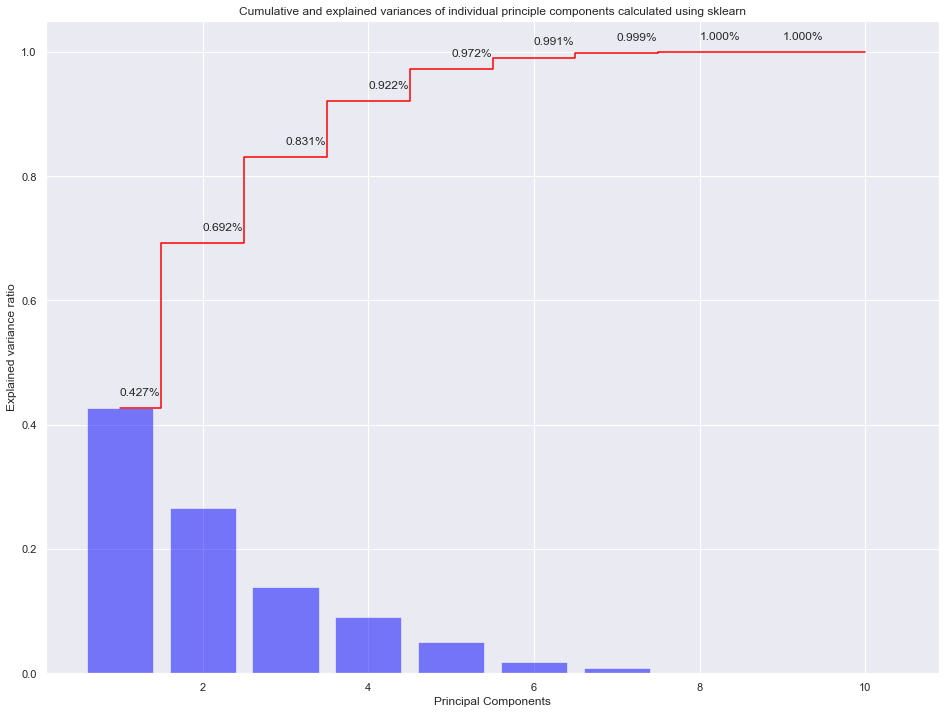



model coefficients with 0.95  variance are  [-1.57838099e-03  2.18956896e-05 -7.49246636e-05 -2.25377842e-04
  3.78632870e-04]


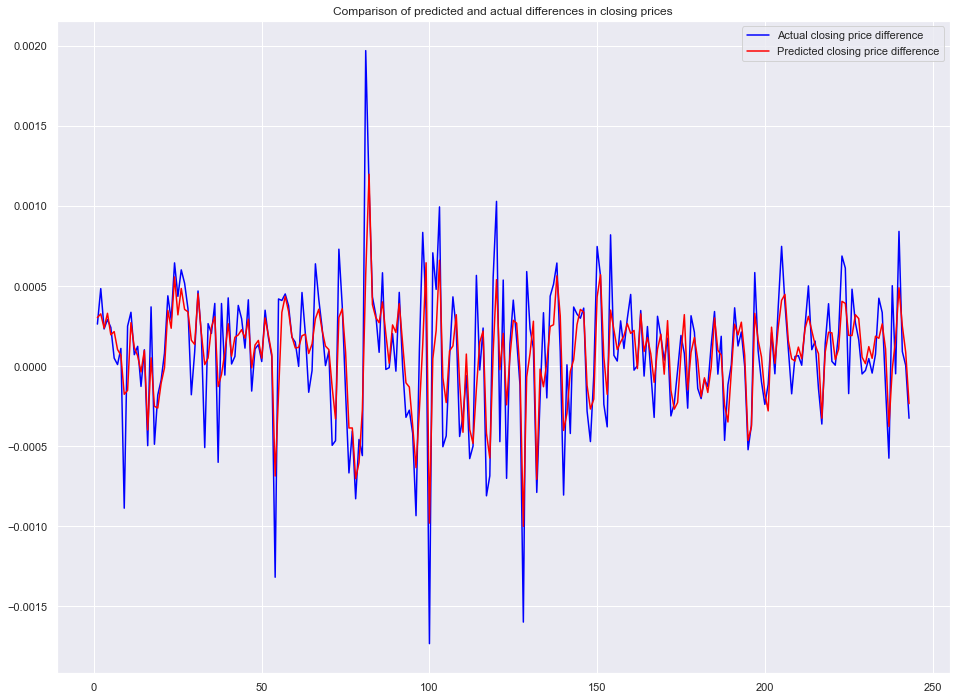





root mean square error with 0.95  variance is  0.024689633907639303


model coefficients with 0.99  variance are  [-1.57838099e-03  2.18956896e-05 -7.49246636e-05 -2.25377842e-04
  3.78632870e-04 -1.61437596e-04]


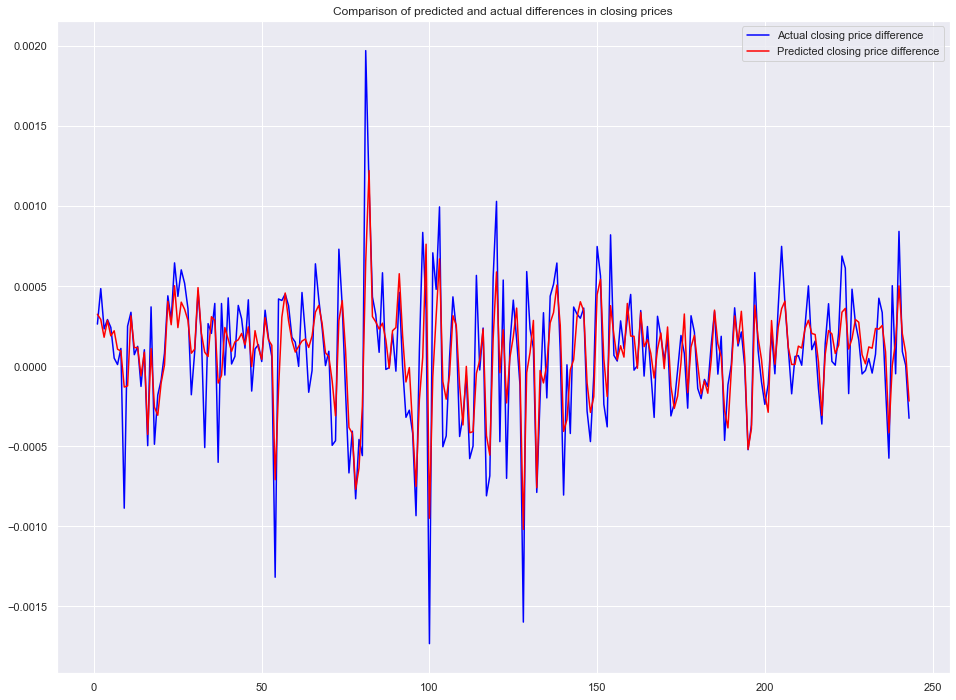





root mean square error with 0.99  variance is  0.02464579542086844


In [41]:
def main():
    preprocess()
    task_one()
    task_two()
    task_three()
    
main()